$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.} \large\text {Scalability issues in Newton’s method} $

In the last few labs, we have been discussing about gradient descent and Newton's methods to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. We discussed the importance of scaling the direction along which the descent step is taken during the update. This scaling helped in better conditioning of the problem. Further we noticed that Newton's method might be fast in most cases when compared to gradient descent. This feature of Newton's method is attractive but is available only under certain assumptions. 


In the implementation of Newton's method, we noticed that the inverse of Hessian is required at each iteration.

$\large\textbf{Question 1.}$ Consider the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x}$ where $A$ is a $n \times n$ symmetric positive definite matrix. 

Note that $\nabla^2 f(\mathbf{x}) = \mathbf{A}$.  We will now investigate the computational effort needed to compute the inverse of the Hessian matrix $A$ for large $n$ values. 

First let us create a useful candidate for $\mathbf{A}$. Then we will check the time taken to compute the inverse of matrix $\mathbf{A}$.

In [ ]:
#code for creating a random positive definite matrix 
#we will first import the numpy package and name it as np

import numpy as np 
#create a random nxn matrix 
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 

#check if A is in fact symmetric positive definite 
print('Is A symmetric? Answer:', np.sum(np.sum(np.subtract(A,A.T))) == 0 )
print('Is A positive definite? Answer:', np.amin(np.linalg.eigvalsh(A))>0 )

Is A symmetric? Answer: True
Is A positive definite? Answer: True


In [ ]:
#Let us now check the time taken for computing the inverse of matrix A
from timeit import default_timer as timer
start_time = timer()
A_inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute inverse of A:',end_time - start_time) 

NameError: ignored

$\large\textbf{Question 2 :}$ Choose $n \in \{500,1000,2500,5000,7500,10000\}$ and find the time taken to compute the inverse of $\mathbf{A}$ for each possible value of $n$. Comment on your observations. Do you observe similar trends in the time taken to test the positive definiteness of $\mathbf{A}$ ? Comment and provide appropriate reasons for your observations. 

In [ ]:
value=np.array([500,1000,2500,5000,7500,10000])
for n in value:
  B = np.random.rand(n, n)
  A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
  A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 

#check if A is in fact symmetric positive definite 
  print('\n Is A',[n],' symmetric? Answer:', np.sum(np.sum(np.subtract(A,A.T))) == 0 )
  print('Is A',[n],'positive definite? Answer:', np.amin(np.linalg.eigvalsh(A))>0 )
  start_time = timer()
  A_inv = np.linalg.inv(A)
  end_time = timer()
  print('\n Time taken to compute inverse of A for a   matrix of order ',n,' is :',end_time - start_time)


 Is A [500]  symmetric? Answer: True
Is A [500] positive definite? Answer: True

 Time taken to compute inverse of A for a   matrix of order  500  is : 0.022501354000269203

 Is A [1000]  symmetric? Answer: True
Is A [1000] positive definite? Answer: True

 Time taken to compute inverse of A for a   matrix of order  1000  is : 0.14965745699919353

 Is A [2500]  symmetric? Answer: True
Is A [2500] positive definite? Answer: True

 Time taken to compute inverse of A for a   matrix of order  2500  is : 1.509748106999723

 Is A [5000]  symmetric? Answer: True
Is A [5000] positive definite? Answer: True

 Time taken to compute inverse of A for a   matrix of order  5000  is : 10.61170124399996

 Is A [7500]  symmetric? Answer: True
Is A [7500] positive definite? Answer: True

 Time taken to compute inverse of A for a   matrix of order  7500  is : 36.75023626299935

 Is A [10000]  symmetric? Answer: True
Is A [10000] positive definite? Answer: True

 Time taken to compute inverse of A for a 

$\large\textbf{Comment :}$ The time taken to
test the positive definiteness of A  is increases very fast when we increase the values of n.

$\large\textbf{Question 4 [R]:}$

Implement Newton's method to solve the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ where $f(\mathbf{x})=f(x_1,x_2,\ldots,x_n) = \sum_{i=1}^{n-1} \left [2(x_i^2 - x_{i+1})^2 + (x_i-1)^2) \right ]$. Take $n \in \{1000, 2500, 5000, 7500, 10000\}$ and compute the time taken by the Newton's method to find the minimizer for each value of $n$. Take the starting point to be $\mathbf{x}^0 = (0,0,\ldots,0)$. Choose $\eta^k = 1, \forall k $ in the implementation of Newton's method. Prepare a graph where you plot the time taken by Newton's method vs $n$.

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x, n):  
  #Input: x is a numpy array of size n 
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  
  fval=0 
  for i in range (0,n-1):
    function=2*((x[i]**2-x[i+1])**2)+(x[i]-1)**2
    fval=fval+function
  
  return (fval)

In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x, n):  
  #Input: x is a numpy array of size n
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it
  gradient=[]
  for i in range(0,n):
    if i == 0:
      f1=4*(x[i]**2-x[i+1])*2*x[i]+2*(x[i]-1)
      gradient.append(f1)
    elif i!=0 and i!=n-1:

      f2=4*(x[i]**2-x[i+1])*2*x[i]+2*(x[i]-1)-4*(x[i-1]**2-x[i])
      gradient.append(f2)
    elif i==n-1:
      f3=-4*(x[i-1]**2-x[i])
      gradient.append(f3)
  grad=np.array(gradient)
  return grad 
  

In [ ]:
import numpy as np
def evalh(x,n):
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  hess=np.zeros((n,n))
  hess[0][0]=8*(x[0]**2-x[1])+16*x[0]**2+2
  hess[0][1]=-8*x[0]
  for i in range(1,n-1):
    hess[i][i]=4+8*(x[i]**2-x[i+1])+16*x[i]**2+2
    hess[i][i+1]=-8*x[i]
    hess[i][i-1]=hess[i-1][i]
  hess[n-1][n-2]=hess[n-2][n-1]
  hess[n-1][n-1]=4
  hess1=np.linalg.inv(hess)
  return hess1


  

In [ ]:
#line search type 
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH = 2
EXACT_LINE_SEARCH = 1

In [ ]:
def find_minimizer_Newtonmethod(start_x, n, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary type arguments 
   #do not allow arbitrary size arguments 
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x,n)
  h_x = evalh(x,n)
  k = 0
  
  #print('iter:',k,  ' f(x):', evalf(x,n), ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol):
    direction = np.matmul(-g_x, h_x)
    if line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 1
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,direction,alpha_start,rho, gamma)
    else:
      pass
    x = np.add(x, step_length*direction) 
    k = k+1 #increment iteration
    g_x = evalg(x,n) #compute gradient at new pointA 
    gradf=evalg(x,n)
    h_x=evalh(x,n)
    #print('iter:',k,  ' f(x):', evalf(x,n), ' gradient norm:', np.linalg.norm(g_x))
  return x, evalf(x,n), k

In [ ]:
from timeit import default_timer as timer
values = [1000,2500,5000,7500,10000]


my_tol= 1e-9
for i in values:
  my_start_x = np.zeros(i)
  start=timer()
  x_opt, opt_fval, num_iters = find_minimizer_Newtonmethod(my_start_x, i, my_tol, CONSTANT_STEP_LENGTH)
  end=timer()
  print('time taken for n=',i,'is',end-start)

time taken for n= 1000 is 1.6409181869998974
time taken for n= 2500 is 17.51588658799983
time taken for n= 5000 is 122.267339343
time taken for n= 7500 is 428.90517445900014
time taken for n= 10000 is 944.2217577929996


$\large\textbf{Now ,  Prepare a graph where you plot the time taken by Newton's method vs  n .}$


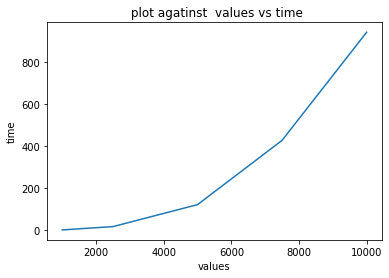

In [ ]:
import matplotlib.pyplot as plt
values =[1000,2500,5000,7500,10000]
time = [1.6409181869998974, 17.51588658799983, 122.267339343, 428.90517445900014, 944.2217577929996]
plt.plot(values,time)
plt.xlabel('values')
plt.ylabel('time')
plt.title(' plot agatinst  values vs time')
plt.show()